# Non-parametric analysis of right-censor failure data.
This example demonstrates non-parametric reliability analysis of right-censored failure data.

In [1]:
# Following to allow use of ramsmod library.
import sys
!{sys.executable} -m pip install ramsmod

### Load failure data 1
The first step is to load some example failure data from the file [right-censored.csv](../ramsmod/datasets/right-censored.csv). This file is in CSV (comma-separated values) format, with three columns giving the number of the observations, the survival times and whether failure occurred (indicated by a 1) or was right-censored (indicated by a 0). It will be loaded into a Pandas DataFrame, with the first column used as the index, using the `load_right_censored_data` function from the datasets module of the ramsmod library. The `head` method of the DataFrame is used get the first few rows of data as a check that everything worked as expected.

In [3]:
import pandas as pd
from ramsmod.datasets import *

fd1 = load_right_censored_data()
fd1.head()

,t,d
Observation #,,
1,8.0,1
2,11.0,1
3,11.0,0
4,11.0,1
5,12.0,0
6,12.0,1
7,12.0,0
8,18.0,0
9,18.0,0


### Visualise failure times
The failure times in this data can be visualised using the `plot_right_censored` function from the plotting module of the ramsmod library. This function takes two arguments, the first of which is a Pandas Series with the survival times for the observations in the failure data and the second of which is a Pandas Series with the corresponding indicator values of whether the time represents a failure (1) or right-censoring (0) time. Remember that each of the columns in a DataFrame is a Series and can be obtained in various ways, such as indexing by the column name as is shown below. The function also accepts two optional keyword arguments: an `ax` keyword argument with the Matplotlib axes on which to plot the data (by default it will create a new one) and a `show_legend` keyword argument that tells it whether to display a legend on the plot (default is True). 

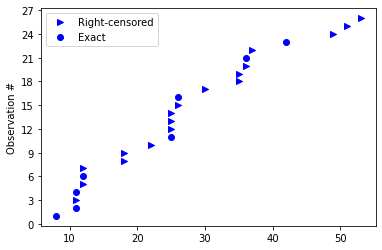

In [4]:
from ramsmod.plotting import plot_right_censored
import matplotlib.pyplot as plt

plot_right_censored(fd1['t'], fd1['d'])
plt.savefig("figs/right-censored-data.png")

As shown there are 26 obervations in this failure data sample, including 8 failures with the remainder right-censored.

### Fitting reliability function with Kaplan-Meier method
The next step is to fit a reliability function to the data using the Kaplan-Meier method. The fitting module of the ramsmod library has a `kaplan_meier_fit` method for this purpose. This method has two required arguments: a Pandas Series with the surivival times of the observations in the failure data and a Pandas Series with corresponding indicator variable values for whether failure or right-censoring occurred. It also has a couple of optional keyword arguments: `ci` which accepts values of 'gw' and 'egw' for adding Greenwood's and Greenwood's exponential confidence intervals, respectively, and `alpha` which specifies the level of significance for the confidence interval (default is 0.05, giving a 95% confidence interval). The function returns a Pandas DataFrame with the results.

Here the Greenwood's exponential confidence interval will be used at the default significance level.

In [5]:
from ramsmod.fitting import kaplan_meier_fit

km_fd1 = kaplan_meier_fit(fd1['t'], fd1['d'], ci='gw')

km_fd1

,t,m,q,n,R,CI Lower,CI Upper
f,,,,,,,
0,0.0,0,0.0,26,1.000000,1.000000,1.000000
1,8.0,1,0.0,26,0.961538,0.887619,1.035458
2,11.0,2,1.0,25,0.884615,0.761811,1.007419
3,12.0,1,5.0,22,0.844406,0.704157,0.984654
4,25.0,1,3.0,16,0.791630,0.626347,0.956913
5,26.0,1,4.0,12,0.725661,0.530009,0.921313
6,36.0,1,2.0,7,0.621995,0.369985,0.874005
7,42.0,1,3.0,4,0.466496,0.141861,0.791132


The index of the DataFrame, labelled 'f', refers to the index of the ordered failure times (e.g. index 5 is the 5th distinct time at which a failure occurred in the data). Column 't' gives the time of the ordered failure time, column 'm' gives the number of failures that occurred at that time, 'n' gives the number at risk of failing at that time, column 'R' gives the reliability estimates and columns 'CI Lower' and 'CI Upper' give the lower and upper bounds of the confidence interval for the reliability estimates.

### Plot reliability curve
The reliability curve from these estimates is a step function that can be plotted using the `plot_np_reliability` function from the plotting module of the ramsmod library. This function has two required arguments, a Pandas Series with the time values and a Pandas Series with the corresponding reliability estimates. It also has optional keyword arguments `ci_lb` and `ci_ub` for Pandas Series giving the reliability estimates for the lower and upper bounds of the confidence interval respectively, `ax` for the Matplotlib Axes on which to draw the plot (default is to create a new Axes), `linestyle` and `color` for the linestyle and color of the plot lines (defaults are '-' and 'blue') and `label` for the plot line label (shown if a legend is added to the plot). The function returns the Matplotlib Axes containing the plot, with the confidence interval lines shown with 50% transparency.

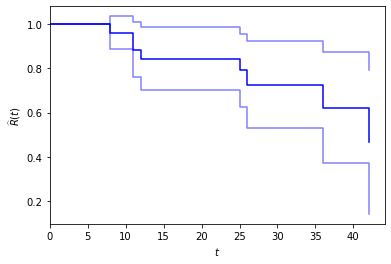

In [6]:
from ramsmod.plotting import plot_np_reliability

ax = plot_np_reliability(km_fd1['t'], km_fd1['R'], ci_lb=km_fd1['CI Lower'], ci_ub=km_fd1['CI Upper'])

plt.savefig("figs/right-censored-km-plot.png")

In [7]:
In the plot, the point reliability estimates are shown as a continuous dark line whilst the confidence interval bounds are shown as a dashed lighter line. According to the curve, the reliability is estimated to fall to appoximately 0.8 within 25 time units and to under 0.5 by 45 time units. However, the confidence intervals show that there is considerable uncertainty in these estimates.
### Load and analyse failure data 2
For comparison, a second set of right-censored failure data from the file [right-censored-2.csv](../ramsmod/datasets/right-censored-2.csv) containing 22 observations, will now be analysed through the Kaplan-Meier method in the same way.

,t,d
Observation #,,
1,8,1
2,9,1
3,10,1
4,10,1
5,16,1


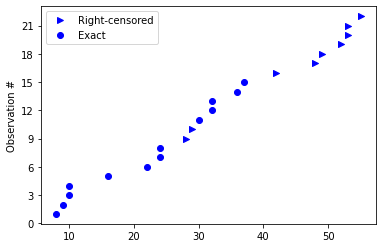

In [8]:
plot_right_censored(fd2['t'], fd2['d'])
plt.savefig("figs/right-censored-data2.png")

In [9]:
km_fd2 = kaplan_meier_fit(fd2['t'], fd2['d'], ci='gw')
km_fd2

,t,m,q,n,R,CI Lower,CI Upper
f,,,,,,,
0,0,0,0.0,22,1.000000,1.000000,1.000000
1,8,1,0.0,22,0.954545,0.867504,1.041586
2,9,1,0.0,21,0.909091,0.788963,1.029219
3,10,2,0.0,20,0.818182,0.657013,0.979350
4,16,1,0.0,18,0.772727,0.597612,0.947842
5,22,1,0.0,17,0.727273,0.541171,0.913374
6,24,2,2.0,16,0.636364,0.435351,0.837376
7,30,1,0.0,12,0.583333,0.373917,0.792749
8,32,2,0.0,11,0.477273,0.260397,0.694149


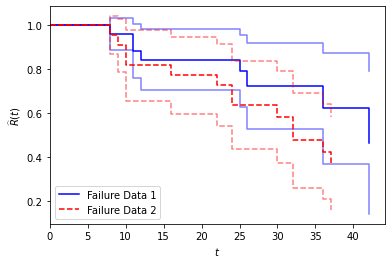

In [10]:
import matplotlib.pyplot as plt

ax = plot_np_reliability(km_fd1['t'], km_fd1['R'], ci_lb=km_fd1['CI Lower'], ci_ub=km_fd1['CI Upper'], label='Failure Data 1')
plot_np_reliability(km_fd2['t'], km_fd2['R'], ci_lb=km_fd2['CI Lower'], ci_ub=km_fd2['CI Upper'], ax=ax, linestyle='--', color='red', label='Failure Data 2')
plt.legend()
plt.savefig("figs/right-censored-data-km-comparison.png")

It appears from the above plot of the reliability curves that the reliability for the first set of failure data is higher, although there is high uncertainty.

## Log-rank test

Let's check this using a log-rank test performed at the 5% significance level. The function `log_rank_test` from the stats module of the ramsmod library can be used to perform this test which assesses the null hypothesis that the two groups have the same reliability function, using failure data from those two groups. This function has four required arguments, `t1` and `d1`, representing the survival times and right-censoring indicator variable values for the failure data from the first group, and `t2` and `d2`, representing the same for the failure data from the second group. The function returns four values - (table, stat, var, p). The first is a table of the values used in the computation of the log-rank statistic, the second is the value of the chi-square statistic, the third is the variance value calculated as part of the chi-square statistic calculation, and the final value is the p-value for the test (i.e. the probability of obtaining a chi-square statistic as extreme as observed if the null hypothesis were true).

In [11]:
from ramsmod.stats import log_rank_test

table, stat, var, p = log_rank_test(fd1['t'], fd1['d'], fd2['t'], fd2['d'])

print(f'Chi-Square statistic: {stat:.2f}, Estimated variance: {var:.2f}, P-Value: {p:.2f}.')

table

Chi-Square statistic: 1.17, Estimated variance: 5.06, P-Value: 0.28.


,tf,m1f,m2f,n1f,n2f,e1f,e2f
0,8.0,1,1,26,22,1.083333,0.916667
1,9.0,0,1,25,21,0.543478,0.456522
2,10.0,0,2,25,20,1.111111,0.888889
3,11.0,2,0,25,18,1.162791,0.837209
4,12.0,1,0,22,18,0.550000,0.450000
5,16.0,0,1,19,18,0.513514,0.486486
6,22.0,0,1,17,17,0.500000,0.500000
7,24.0,0,2,16,16,1.000000,1.000000
8,25.0,1,0,16,14,0.533333,0.466667
9,26.0,1,0,12,14,0.461538,0.538462


Since the p-value here is 0.28 then the null-hypothesis cannot be rejected at the 5% significance level as $0.28\geq 0.05$.